These are the imports.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, RegressorMixin
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = os.path.join(os.getcwd(), 'Salary_Data.csv')
salary = pd.read_csv(path)

We are now going to create a dataframe using pandas. 

In [3]:
data = pd.DataFrame(salary)
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


We want to remove duplicates. 

In [4]:
data = data.drop_duplicates()
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6623,43.0,Female,Master's Degree,Digital Marketing Manager,15.0,150000.0
6624,27.0,Male,High School,Sales Manager,2.0,40000.0
6625,33.0,Female,Bachelor's Degree,Director of Marketing,8.0,80000.0
6628,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0


Let's look for any data with null data, and then remove it. 

In [5]:
data[data.isnull().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


Next, let's drop the records that have any null values in them. 

In [6]:
data = data.dropna()
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6623,43.0,Female,Master's Degree,Digital Marketing Manager,15.0,150000.0
6624,27.0,Male,High School,Sales Manager,2.0,40000.0
6625,33.0,Female,Bachelor's Degree,Director of Marketing,8.0,80000.0
6628,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0


We want to get the average salary for both male and females. 

In [7]:
# Grabbing the data
female_data = data[data['Gender'] == 'Female']
male_data = data[data['Gender'] == 'Male']
other_data = data[data['Gender'] == 'Other']

# Getting the number of each gender on the records
female_count = len(female_data)
male_count = len(male_data)
other_count = len(other_data)

# Getting the average of the salaries for each gender category
female_avg_salary = round(female_data.Salary.mean(), 2)
male_avg_salary = round(male_data.Salary.mean(), 2)
other_avg_salary = round(other_data.Salary.mean(), 2)

# Getting the median
female_median_salary = round(female_data.Salary.median(), 2)
male_median_salary = round(male_data.Salary.median(), 2)
other_median_salary = round(other_data.Salary.median(), 2)

# Getting the lowest salary
female_low_salary = round(female_data.Salary.min(), 2)
male_low_salary = round(male_data.Salary.min(), 2)
other_low_salary = round(male_data.Salary.min(), 2)

# Getting the highest salary
female_highest_salary = round(female_data.Salary.max(), 2)
male_highest_salary = round(male_data.Salary.max(), 2)
other_highest_salary = round(male_data.Salary.max(), 2)

male_summary = f'Male:\n\tCount: {male_count}\n\tAverage Salary: ${male_avg_salary}\n\tMedian Salary: ${male_median_salary}\n\tLow: ${male_low_salary}\n\tMax Salary: ${male_highest_salary}\n'
female_summary = f'Female:\n\tCount: {female_count}\n\tAverage Salary: ${female_avg_salary}\n\tMedian Salary: ${female_median_salary}\n\tLow: ${female_low_salary}\n\tMax Salary: ${female_highest_salary}\n'
other_summary = f'Non-binary:\n\tCount: {other_count}\n\tAverage Salary: ${other_avg_salary}\n\tMedian Salary: ${other_median_salary}\n\tLow: ${other_low_salary}\n\tMax Salary: ${other_highest_salary}'
print(male_summary + female_summary + other_summary)

Male:
	Count: 966
	Average Salary: $118056.2
	Median Salary: $120000.0
	Low: $350.0
	Max Salary: $250000.0
Female:
	Count: 814
	Average Salary: $107294.8
	Median Salary: $104851.0
	Low: $500.0
	Max Salary: $220000.0
Non-binary:
	Count: 7
	Average Salary: $125819.0
	Median Salary: $158254.0
	Low: $350.0
	Max Salary: $250000.0


We can see that non-binary people have the highest salaries on average, but this is only because there is a very small number of non-binary people in the records. Comparing the men and the women against each other, we can see that women have a lower average salary and a lower median salary than men. Women also have a lower max salary, but a higher min salary.

We now want to compare the salaries of those with different levels of education. Let me create a series for all of those first. 

In [8]:
degrees = data['Education Level'].unique()
degrees

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

We need to change the records that have Degree at the end as their indicated Education Level to just Bachelor's to make our data easier to work with. 

In [9]:
data['Education Level'] = data['Education Level'].replace(["Bachelor's Degree", "Master's Degree", "phD"], ["Bachelor's", "Master's", "PhD"])

The warning should be ignored, as the intended functionality was achieved. 

In [10]:
degrees = data['Education Level'].unique()
degrees

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

In [11]:
# Grabbing the data
highschool_level =  data[data['Education Level']== 'High School']
undergrad_level = data[data['Education Level'] == "Bachelor's"]
masters_level = data[data['Education Level'] == "Master's"]
phd_level = data[data['Education Level'] == 'PhD']

# Getting the number of each category
highschool_count = len(highschool_level)
undergrad_count = len(undergrad_level)
masters_count = len(masters_level)
phd_count = len(phd_level)

# Getting the average of the salaries for each category
highschool_avg_salary = round(highschool_level.Salary.mean(), 2)
undergrad_avg_salary = round(undergrad_level.Salary.mean(), 2)
masters_avg_salary = round(masters_level.Salary.mean(), 2)
phd_avg_salary = round(phd_level.Salary.mean(), 2)

# Getting the median of the salaries for each category
highschool_median_salary = round(highschool_level.Salary.median(), 2)
undergrad_median_salary = round(undergrad_level.Salary.median(), 2)
masters_median_salary = round(masters_level.Salary.median(), 2)
phd_median_salary = round(phd_level.Salary.median(), 2)

# Getting the lowest and highest salaries
highschool_low_salary, highschool_high_salary = highschool_level.Salary.min(), highschool_level.Salary.max()
undergrad_low_salary, undergrad_high_salary = undergrad_level.Salary.min(), undergrad_level.Salary.max()
masters_low_salary, masters_high_salary = masters_level.Salary.min(), masters_level.Salary.max()
phd_low_salary, phd_high_salary = phd_level.Salary.min(), phd_level.Salary.max()

h_summary = f'High School:\n\tCount: {highschool_count}\n\tAverage Salary: ${highschool_avg_salary}\n\tMedian Salary: ${highschool_median_salary}\n\tLow: ${highschool_low_salary}\n\tMax Salary: ${highschool_high_salary}\n'
u_summary = f"Bachelor's:\n\tCount: {undergrad_count}\n\tAverage Salary: ${undergrad_avg_salary}\n\tMedian Salary: ${undergrad_median_salary}\n\tLow: ${undergrad_low_salary}\n\tMax Salary: ${undergrad_high_salary}\n"
m_summary = f"Master's:\n\tCount: {masters_count}\n\tAverage Salary: ${masters_avg_salary}\n\tMedian Salary: ${masters_median_salary}\n\tLow: ${masters_low_salary}\n\tMax Salary: ${masters_high_salary}\n"
p_summary = f'PhD:\n\tCount: {phd_count}\n\tAverage Salary: ${phd_avg_salary}\n\tMedian Salary: ${phd_median_salary}\n\tLow: ${phd_low_salary}\n\tMax Salary: ${phd_high_salary}\n'

print(h_summary + u_summary + m_summary + p_summary)


High School:
	Count: 110
	Average Salary: $45435.98
	Median Salary: $35000.0
	Low: $25000.0
	Max Salary: $166109.0
Bachelor's:
	Count: 768
	Average Salary: $91145.57
	Median Salary: $80000.0
	Low: $350.0
	Max Salary: $250000.0
Master's:
	Count: 568
	Average Salary: $127432.81
	Median Salary: $127131.0
	Low: $32000.0
	Max Salary: $228000.0
PhD:
	Count: 341
	Average Salary: $160942.52
	Median Salary: $170000.0
	Low: $579.0
	Max Salary: $250000.0



Let's use matplotlib to plot the graphs.

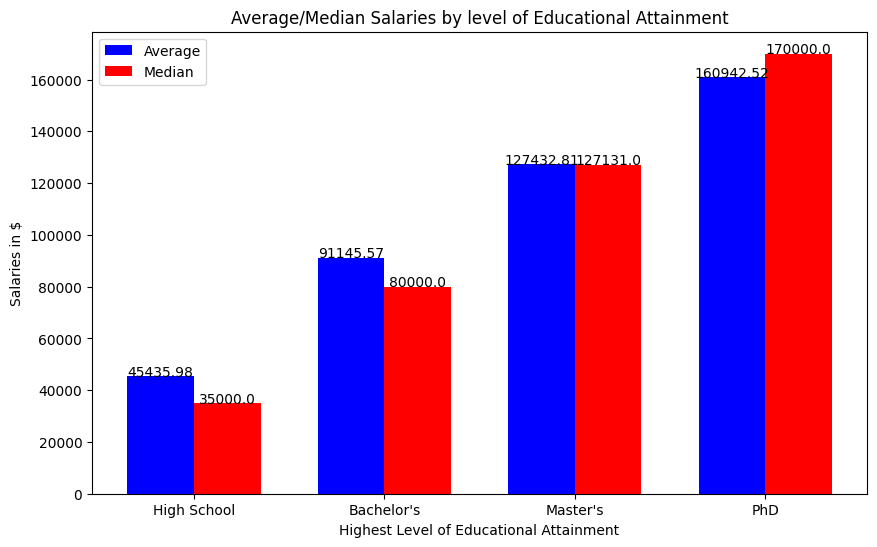

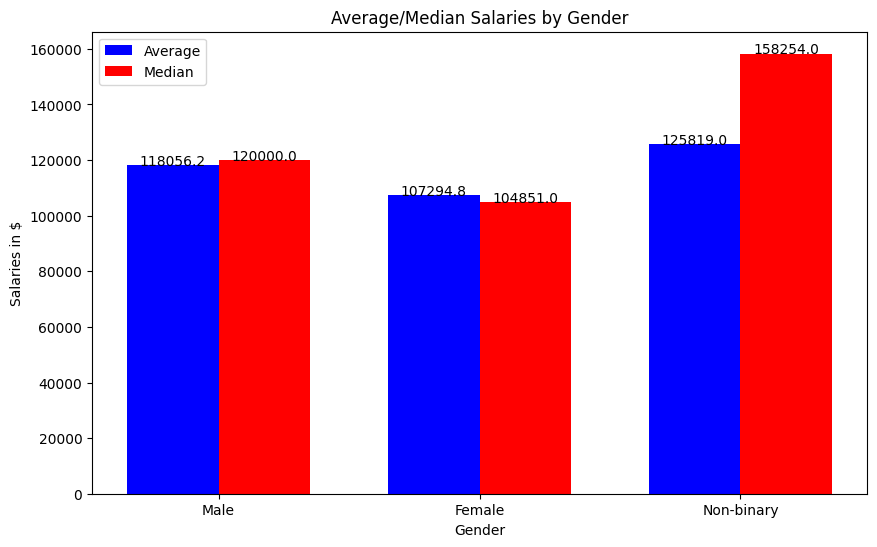

In [12]:
# Plotting for qualifications
cert = ['High School', "Bachelor's", "Master's", 'PhD']
avg_salary = [highschool_avg_salary, undergrad_avg_salary, masters_avg_salary, phd_avg_salary]
med_salary = [highschool_median_salary, undergrad_median_salary, masters_median_salary, phd_median_salary]
n = len(cert)
ind = np.arange(n)
w = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
avg_bar = ax.bar(ind, avg_salary, w, color='blue')
med_bar = ax.bar(ind+w, med_salary, w, color ='red')
for i in range(n):
    ax.text(ind[i], avg_salary[i], str(avg_salary[i]), ha = 'center', fontsize= 10)
    ax.text(ind[i]+w, med_salary[i], str(med_salary[i]), ha = 'center', fontsize= 10)
ax.set_ylabel('Salaries in $')
ax.set_title('Average/Median Salaries by level of Educational Attainment')
ax.set_xticks(ind+w/2)
plt.xlabel('Highest Level of Educational Attainment')
ax.set_xticklabels(cert)
ax.legend((avg_bar[0], med_bar[0]), ('Average', 'Median'))
plt.show()
# Plotting for gender
gender = ['Male', 'Female', 'Non-binary']
avg_salary_gender = [male_avg_salary, female_avg_salary, other_avg_salary]
med_salary_gender = [male_median_salary, female_median_salary, other_median_salary]
n = len(gender)
ind = np.arange(n)
w = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
avg_bar = ax.bar(ind, avg_salary_gender, w, color='blue')
med_bar = ax.bar(ind+w, med_salary_gender, w, color ='red')
for i in range(n):
    ax.text(ind[i], avg_salary_gender[i], str(avg_salary_gender[i]), ha = 'center', fontsize= 10)
    ax.text(ind[i]+w, med_salary_gender[i], str(med_salary_gender[i]), ha = 'center', fontsize= 10)
ax.set_ylabel('Salaries in $')
ax.set_title('Average/Median Salaries by Gender')
ax.set_xticks(ind+w/2)
ax.set_xticklabels(gender)
plt.xlabel('Gender')
ax.legend((avg_bar[0], med_bar[0]), ('Average', 'Median'))
plt.show()

We can see from the data above that it is beneficial to aim for higher levels of academic attainment, as it is linked with a higher income. 
We can also see from the data that non-binaries have the highest average and median salaries. Now, let's look at the relationship between years of experience and income. We can use a scatter plot to roughly graph the data. 

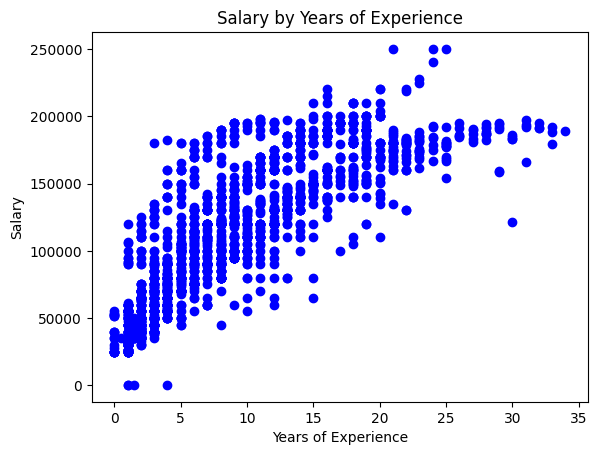

In [13]:
xp = data['Years of Experience']
salary = data['Salary']
plt.scatter(xp, salary, color='blue')
plt.title('Salary by Years of Experience')
plt.ylabel('Salary')
plt.xlabel('Years of Experience')
plt.show()

There seems to be a positive correlation between years of experience and salary; that is, as you get more years of experience, you get paid more. 

Let's make a formula that creates a graph given some information to make it easier for me to analyze information, and allow for analysis to be less time consuming and cumbersome.  

In [14]:

def get_salary_stats(categories: list, column: str, using_numbers: bool=False) -> dict:
    """Gets the salary stats for people
    """
    categories_list = []
    d = {} # What we are going to return. 
    if not using_numbers:
        for category in categories:
            categories_list.append(data[data[column] == category])
    else:
        for category in categories:
            categories_list.append(data[category[0]])
    # At this point, all the categories are added.
    count = [len(item) for item in categories_list]
    avg_salaries, med_salaries = [round(item.Salary.mean(), 2) for item in categories_list], [round(item.Salary.median(), 2) for item in categories_list]

    low_salary, max_salary = [item.Salary.min() for item in categories_list], [item.Salary.max() for item in categories_list]
    # All the information we need is here. Just to create the data we need 
    if not using_numbers:
        for x in range(len(categories)):
            d[categories[x]] = {}
            d[categories[x]]['avg_salary'], d[categories[x]]['med_salary'] = avg_salaries[x], med_salaries[x]
            d[categories[x]]['count'], d[categories[x]]['low_salary/max'] = count[x], (low_salary[x], max_salary[x])
    else:
        l = [obj[1] for obj in categories]
        for x in range(len(categories)):
            d[l[x]] = {}
            d[l[x]]['avg_salary'], d[l[x]]['med_salary'] = avg_salaries[x], med_salaries[x]
            d[l[x]]['count'], d[l[x]]['low_salary/max'] = count[x], (low_salary[x], max_salary[x])
    return d
# Quick test
    
def create_graph(categories: list, column: str, using_numbers:bool=False):
    stats = get_salary_stats(categories, column, using_numbers)
    labels = [obj for obj in stats]
    avg_salaries = [stats[category]['avg_salary'] for category in stats]
    med_salaries = [stats[category]['med_salary'] for category in stats]
    n = len(categories)
    ind = np.arange(n)
    w = 0.35
    fig, ax = plt.subplots(figsize=(10, 6))
    avg_bar = ax.bar(ind, avg_salaries, w, color='blue')
    med_bar = ax.bar(ind+w, med_salaries, w, color='red')
    for i in range(n):
        ax.text(ind[i], avg_salaries[i], str(avg_salaries[i]), ha = 'center', fontsize=10)
        ax.text(ind[i]+w, med_salaries[i], str(med_salaries[i]), ha = 'center', fontsize=10)
    ax.set_ylabel('Salaries')
    ax.set_xlabel(column)
    ax.set_title('Average/Median Salaries by ' + column)
    ax.set_xticks(ind+w/2)
    ax.set_xticklabels(labels)
    ax.legend((avg_bar[0], med_bar[0]), ('Average', 'Median'))


Now that we have made methods that will make analysing the data less cumbersome, we may move on to more analysis. We want to analyse the salaries of the people by job occupation.


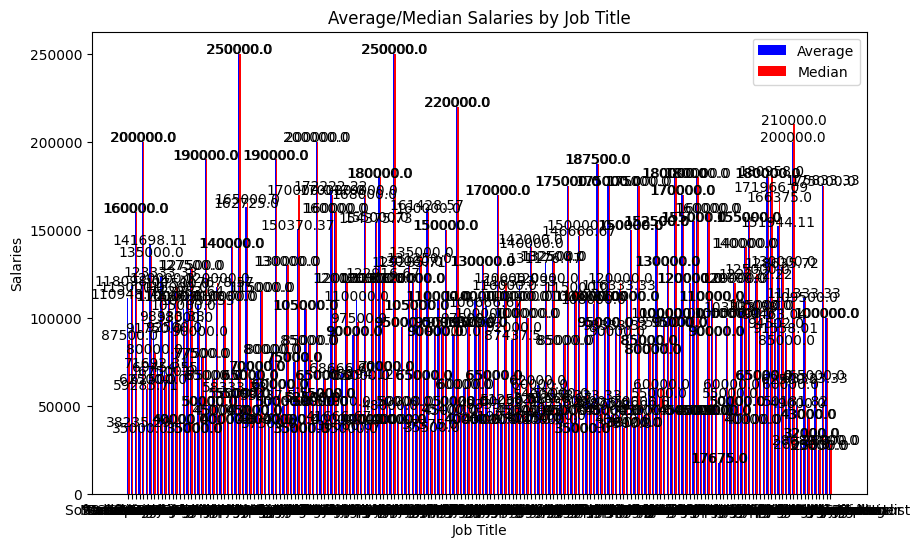

In [15]:
# Graphing the average/median salaries of people by job occupation. 
create_graph(list(data['Job Title'].unique()), 'Job Title')

This is disorganized. We could try analysis by some other way. (later)

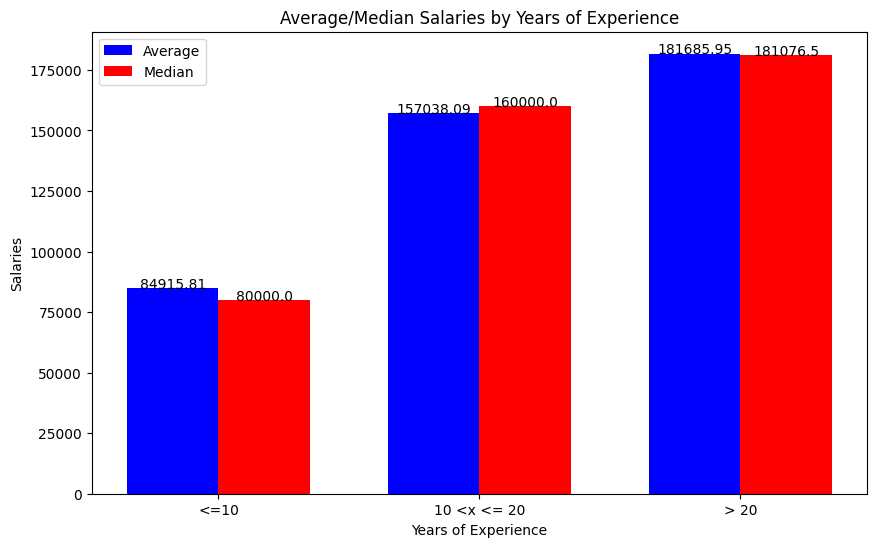

In [16]:
# Doing analysis on years of experience
x=  data['Years of Experience']
categories = [(x <= 10, '<=10'), ((10 < x) & (x <= 20), '10 <x <= 20'), (x>20, '> 20')]
create_graph(categories, 'Years of Experience', True)


From above, we can see that the more experience you have, the more you earn. So there is a positive correlation between the number of years that you work and the amount of money that you are paid. Now, let's look at age as a factor in how much you get paid. 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


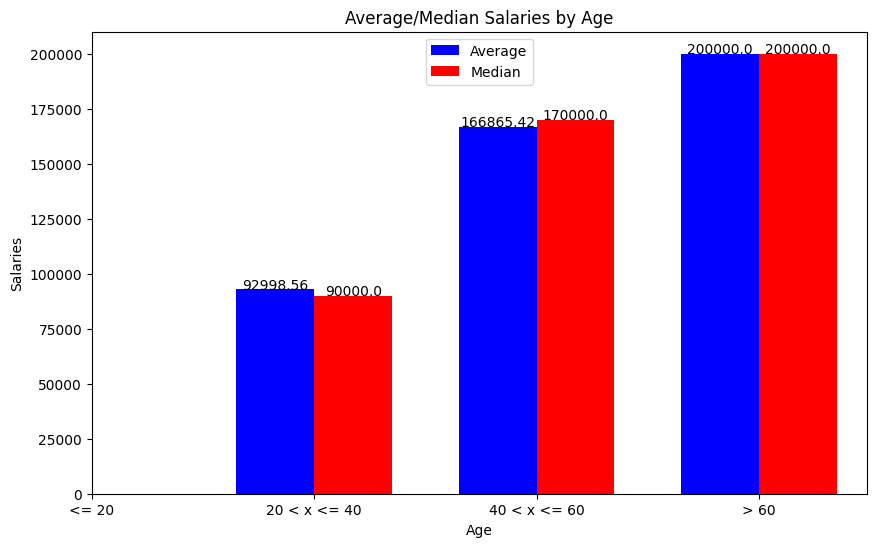

In [17]:
x = data['Age']
categories = [(x<=20, '<= 20'), ((20 < x) & (x <= 40), '20 < x <= 40'), ((40 < x) & (x <= 60), '40 < x <= 60'), ((x > 60), '> 60')]
create_graph(categories, 'Age', True)

From the above data, we can see that no one is below the age of 20 in the data set. We can also see that income increases with age, so there is a positive correlation between age and earnings. Now, let's look at the optimum age to start working to analyze your earning potential. Is it best to start working young? or maybe we'd want to wait and further our education?

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


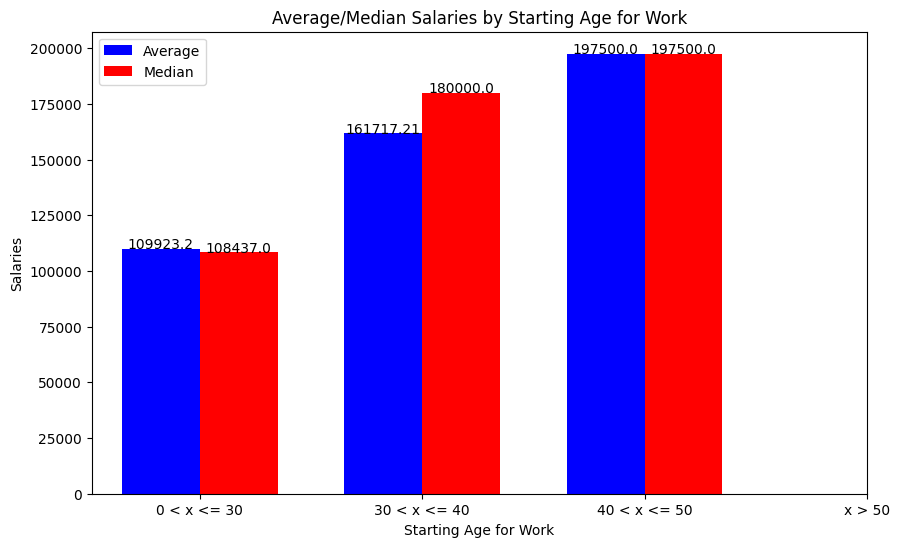

In [18]:
# Making a new column for the date that someone started working
data['Starting Age for Work'] = data['Age'] - data['Years of Experience']
x = data['Starting Age for Work']
categories = [((0 < x) & (x <= 30), '0 < x <= 30'), ((30 < x) & (x <= 40), '30 < x <= 40'), ((40 < x) & (x <= 50), '40 < x <= 50'), ((50 < x), 'x > 50')]
create_graph(categories, 'Starting Age for Work', True)

This data may not convey the point I wanted it to convey. My hypothesis was that the earlier you started working, the higher your income would be. But it seems that those that start later tend to make more. It might have to do with their degree perhaps. Let's see

In [19]:
print(f"Most people from the ages of 40 to 50 had a {data[(data['Starting Age for Work'] > 40) & (data['Starting Age for Work'] <= 50)]['Education Level'].mode()[0]}.")
print(f"Most people from the ages of 30 to 40 had a {data[(data['Starting Age for Work'] > 30) & (data['Starting Age for Work'] <= 40)]['Education Level'].mode()[0]}.")
print(f"Most people that were 30 years old or lower had a {data[data['Starting Age for Work'] <= 30]['Education Level'].mode()[0]}.")

Most people from the ages of 40 to 50 had a PhD.
Most people from the ages of 30 to 40 had a PhD.
Most people that were 30 years old or lower had a Bachelor's.


We can make a graph to represent this data, and look at the other stuff. 

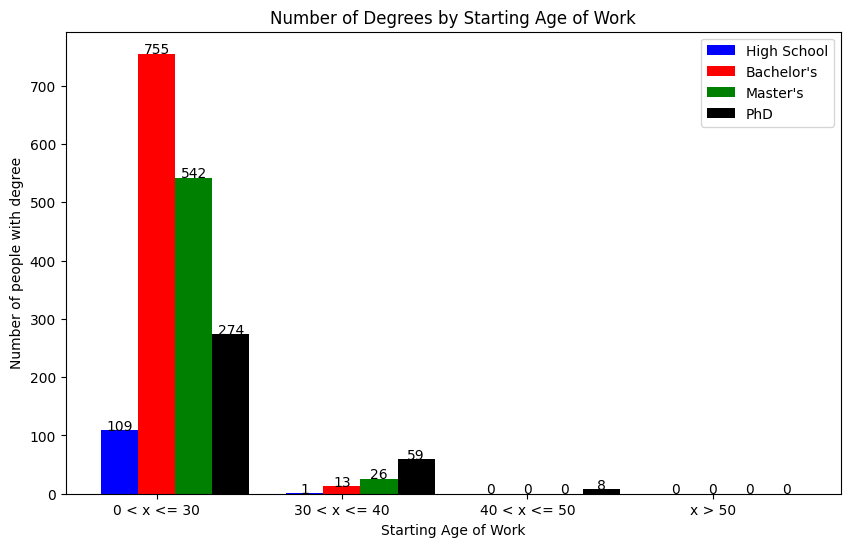

In [20]:
# Creating a graph to compare the age categories to those who didn't work. 
age_categories = [((0 < data['Starting Age for Work']) & (data['Starting Age for Work'] <= 30), '0 < x <= 30'),
                  ((30 < data['Starting Age for Work']) & (data['Starting Age for Work'] <= 40), '30 < x <= 40'),
                  ((40 < data['Starting Age for Work']) & (data['Starting Age for Work'] <= 50), '40 < x <= 50'),
                  ((50 < data['Starting Age for Work']), 'x > 50')]
labels = [obj[1] for obj in age_categories]
high_count = [len(data[category[0] & (data['Education Level'] == 'High School')]) for category in categories]
under_count = [len(data[category[0] & (data['Education Level'] == "Bachelor's")]) for category in categories]
grad_count = [len(data[category[0] & (data['Education Level'] == "Master's")]) for category in categories]
phd_count = [len(data[category[0] & (data['Education Level'] == 'PhD')]) for category in categories]
n = len(age_categories)
ind = np.arange(n)
w = 0.8/4
fig, ax = plt.subplots(figsize=(10, 6))
high_bar = ax.bar(ind, high_count, w, color='blue')
under_bar = ax.bar(ind+w, under_count, w, color='red')
grad_bar = ax.bar(ind+(2*w), grad_count, w, color='green')
phd_bar = ax.bar(ind+(3*w), phd_count, w, color='black')
for i in range(n):
    ax.text(ind[i], high_count[i], str(high_count[i]), ha = 'center', fontsize=10)
    ax.text(ind[i]+w, under_count[i], str(under_count[i]), ha = 'center', fontsize=10)
    ax.text(ind[i]+(2*w), grad_count[i], str(grad_count[i]), ha = 'center', fontsize=10)
    ax.text(ind[i]+(3*w), phd_count[i], str(phd_count[i]), ha = 'center', fontsize=10)
plt.title('Number of Degrees by Starting Age of Work')
plt.ylabel('Number of people with degree')
plt.xlabel('Starting Age of Work')
ax.set_xticks(ind+2*w/2)
ax.set_xticklabels(labels)
ax.legend((high_bar[0], under_bar[0], grad_bar[0], phd_bar[0]), ('High School', "Bachelor's", "Master's", 'PhD'))


Now, let's look at analysis between genders for various degrees. We want to check the discrepancy between women and men at different levels of educational attainment.  

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


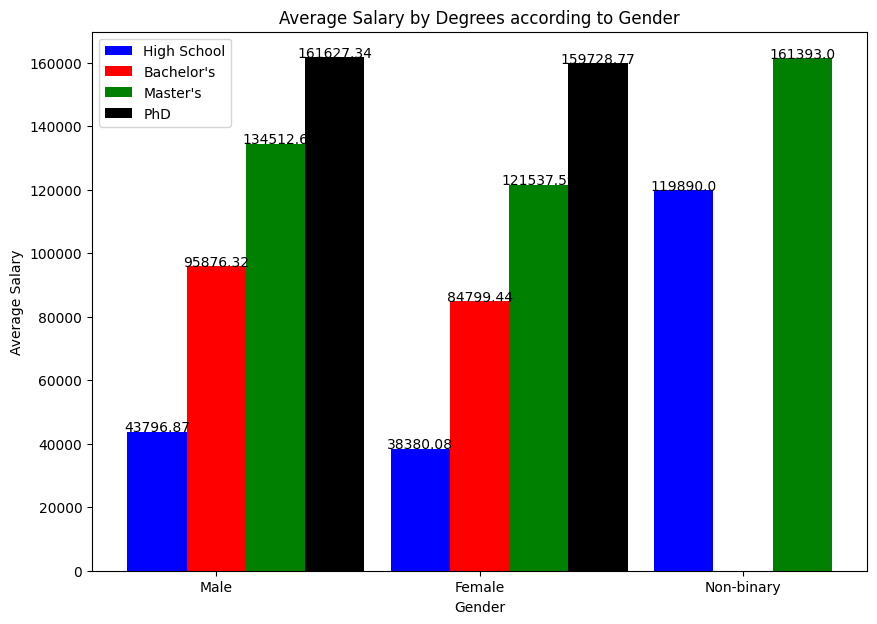

In [21]:
# loading the categories in 
gender_categories = [((data['Gender'] == 'Male'), 'Male'), ((data['Gender'] == 'Female'), 'Female'), ((data['Gender'] == 'Other'), 'Non-binary')]
labels = [obj[1] for obj in gender_categories]

# getting the data for different levels of educational attainment. 
high_count = [round(data[category[0] & (data['Education Level'] == 'High School')].Salary.mean(), 2) for category in gender_categories]
under_count = [round(data[category[0] & (data['Education Level'] == "Bachelor's")].Salary.mean(), 2) for category in gender_categories]
grad_count = [round(data[category[0] & (data['Education Level'] == "Master's")].Salary.mean(), 2) for category in gender_categories]
phd_count = [round(data[category[0] & (data['Education Level'] == 'PhD')].Salary.mean(), 2) for category in gender_categories]

# Plotting the graph
n = len(gender_categories)
ind = np.arange(n)
w = 0.9/4
fig, ax = plt.subplots(figsize=(10, 7))
high_bar = ax.bar(ind, high_count, w, color='blue')
under_bar = ax.bar(ind+w, under_count, w, color='red')
grad_bar = ax.bar(ind+(2*w), grad_count, w, color='green')
phd_bar = ax.bar(ind+(3*w), phd_count, w, color='black')
for i in range(n):
    ax.text(ind[i], high_count[i], str(high_count[i]), ha = 'center', fontsize=10)
    ax.text(ind[i]+w, under_count[i], str(under_count[i]), ha = 'center', fontsize=10)
    ax.text(ind[i]+(2*w), grad_count[i], str(grad_count[i]), ha = 'center', fontsize=10)
    ax.text(ind[i]+(3*w), phd_count[i], str(phd_count[i]), ha = 'center', fontsize=10)
plt.title('Average Salary by Degrees according to Gender')
plt.ylabel('Average Salary')
plt.xlabel('Gender')
ax.set_xticks(ind+2*w/2)
ax.set_xticklabels(labels)
ax.legend((high_bar[0], under_bar[0], grad_bar[0], phd_bar[0]), ('High School', "Bachelor's", "Master's", 'PhD'), loc= 'upper left')


In [22]:
# look at supervised regression models
# look at the one that best suites your data set
# create a model that you can use to predict your salary

We are going to use the sckit library to do our machine learning models. We will look at which one is the best one to use for our model.

In [23]:
# our first model is going to be a decision tree regressor. 
# We are going to set the target, which is the salary. 

# Before we choose the features, we need to do something important
# We can represent the Education Level as such: 1 - High School, 2 - Bachelor's, 3 - Master's, 4 - PhD
data['Education Level'] = data['Education Level'].replace(["High School", "Bachelor's", "Master's", "PhD"], [1, 2, 3, 4])
y = data.Salary


# Let's choose the features that we will use for the model.
features = ['Age', 'Education Level','Years of Experience']
X = data[features]
# We are splitting the data so that 30% of the data set is used for testing
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.7, random_state = 0)

In [24]:
def test_model(model: RegressorMixin, train_X=train_X, train_y=train_y, val_X=val_X, val_y=val_y):
    model.fit(train_X, train_y)
    predictions = model.predict(val_X)
    mae = mean_absolute_error(val_y, predictions)
    return mae

In [25]:
print(f'The mean absolute error for a Decision Regression Tree is {test_model(DecisionTreeRegressor(random_state=1))}')
print(f'The mean absolute error for a Random Forest Tree is {test_model(RandomForestRegressor(random_state=1))}')
print(f'The mean absolute error for a Linear Regression Model is {test_model(LinearRegression())}')

The mean absolute error for a Decision Regression Tree is 19754.280442312815
The mean absolute error for a Random Forest Tree is 18023.664407622353
The mean absolute error for a Linear Regression Model is 21074.60717625203


Let's try and clean up the data for the job title, to make it easier to understand.

In [26]:
# Change any job titles that contain software to just software. 
data.loc[data['Job Title'].str.contains('Software'), 'Job Title'] = 'Software'

In [35]:
data.loc[data['Job Title'].str.contains('Sales'), 'Job Title'] = 'Sales'
data.loc[data['Job Title'].str.contains('Research'), 'Job Title'] = 'Research'
data.loc[data['Job Title'].str.contains('Supply'), 'Job Title'] = 'Supply Chain'
data.loc[data['Job Title'].str.contains('Data'), 'Job Title'] = 'Data'
data.loc[data['Job Title'].str.contains('Scientist'), 'Job Title'] = 'Scientist'
data.loc[data['Job Title'].str.contains('Director'), 'Director'] = 'Management'
data.loc[data['Job Title'].str.contains('Product'), 'Job Title'] = 'Product'
data.loc[data['Job Title'].str.contains('Marketing'), 'Job Title'] = 'Marketing'
data.loc[data['Job Title'].str.contains('HR'), 'Job Title'] = 'HR'
data.loc[data['Job Title'].str.contains('Human Resources'), 'Job Title'] = 'HR'
data.loc[data['Job Title'].str.contains('Financial'), 'Job Title'] = 'Finance'
data.loc[data['Job Title'].str.contains('Finance'), 'Job Title'] = 'Finance'
data.loc[data['Job Title'].str.contains('Operations'), 'Job Title'] = 'Operations'
data.loc[data['Job Title'].str.contains('Engineer'), 'Job Title'] = 'Engineer'
data.loc[data['Job Title'].str.contains('Customer'), 'Job Title'] = 'Customer Service'
data.loc[data['Job Title'].str.contains('VP'), 'Job Title'] = 'VP'
data.loc[data['Job Title'].str.contains('Social Media'), 'Job Title'] = 'Social Media'
data.loc[data['Job Title'].str.contains('Developer'), 'Job Title'] = 'Developer'
data.loc[data['Job Title'].str.contains('Consultant'), 'Job Title'] = 'Consultant'
data.loc[data['Job Title'].str.contains('IT'), 'Job Title'] = 'IT'
data.loc[data['Job Title'].str.contains('Project'), 'Job Title'] = 'Project'
data.loc[data['Job Title'].str.contains('Writer'), 'Job Title'] = 'Writer'
data.loc[data['Job Title'].str.contains('CEO'), 'Job Title'] = 'CEO'
data.loc[data['Job Title'].str.contains('Accountant'), 'Job Title'] = 'Accounting'
data.loc[data['Job Title'].str.contains('UX'), 'Job Title'] = 'UX'
data.loc[data['Job Title'].str.contains('Strategy'), 'Job Title'] = 'Strategy'
data.loc[data['Job Title'].str.contains('Graphic'), 'Job Title'] = 'Graphic Design'
data.loc[data['Job Title'].str.contains('Administrative'), 'Job Title'] = 'Admin'
data.loc[data['Job Title'].str.contains('Business'), 'Job Title'] = 'Business'
data.loc[data['Job Title'].str.contains('Event'), 'Job Title'] = 'Events'
data.loc[data['Job Title'].str.contains('Technical Support'), 'Job Title'] = 'Tech Support'
data.loc[data['Job Title'].str.contains('Recruiter'), 'Job Title'] = 'Recruitment'
data.loc[data['Job Title'].str.contains('Account'), 'Job Title'] = 'Accounting'
data.loc[data['Job Title'].str.contains('Designer'), 'Job Title'] = 'Design'
data.loc[data['Job Title'].str.contains('Chief'), 'Job Title'] = 'Exec Management'
data.loc[data['Job Title'].str.contains('Public Relations'), 'Job Title'] = 'PR'
data.loc[data['Job Title'].str.contains('Specialist'), 'Job Title'] = 'Specialist'
data.loc[data['Job Title'].str.contains('Copywriter'), 'Job Title'] = 'Copywriter'
data.loc[data['Job Title'].str.contains('Quality'), 'Job Title'] = 'QA'
data.loc[data['Job Title'].str.contains('Advertising'), 'Job Title'] = 'Advertising'
data.loc[data['Job Title'].str.contains('Human Capital'), 'Job Title'] = 'Human Capital'

Not differentiating between junior/senior rules for each of these, as the algorithm should be able to infer seniority based on the years of experience.

In [31]:
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Starting Age for Work,Director
0,32.0,Male,2,Software,5.0,90000.0,27.0,NaN
1,28.0,Female,3,Data,3.0,65000.0,25.0,NaN
2,45.0,Male,4,Senior Manager,15.0,150000.0,30.0,NaN
3,36.0,Female,2,Sales,7.0,60000.0,29.0,NaN
4,52.0,Male,3,Director,20.0,200000.0,32.0,Management
...,...,...,...,...,...,...,...,...
6623,43.0,Female,3,Marketing,15.0,150000.0,28.0,NaN
6624,27.0,Male,1,Sales,2.0,40000.0,25.0,NaN
6625,33.0,Female,2,Marketing,8.0,80000.0,25.0,Management
6628,37.0,Male,2,Sales,7.0,90000.0,30.0,NaN


In [36]:
list(data['Job Title'].unique()).__len__()

45

Now we want to use one-hot encoding to change the categorical data into 1s and 0s, so that we can use it for predicting the model. 

In [40]:
# Step 1: Perform one-hot encoding
encoded_job_titles = pd.get_dummies(data['Job Title'])

# Step 2: Add the new columns to your feature set
X_expanded = pd.concat([X, encoded_job_titles], axis=1)
# Split the data
train_X, val_X, train_y, val_y = train_test_split(X_expanded, y, test_size=0.7, random_state = 0)

In [41]:
print(f'The mean absolute error for a Decision Regression Tree is {test_model(DecisionTreeRegressor(random_state=1), train_X, train_y, val_X, val_y)}')
print(f'The mean absolute error for a Random Forest Tree is {test_model(RandomForestRegressor(random_state=1), train_X, train_y, val_X, val_y)}')
print(f'The mean absolute error for a Linear Regression Model is {test_model(LinearRegression(), train_X, train_y, val_X, val_y)}')

The mean absolute error for a Decision Regression Tree is 16388.085931254995
The mean absolute error for a Random Forest Tree is 13548.571934551635
The mean absolute error for a Linear Regression Model is 18230.281504926246
